# Initial analysis

## Executive summary

- most important bullet points
- the validation dataset will be ignored
- not all images seem to be perfectly annotated

## More information

**1 - why ignore the validation dataset**

As observed and explained on the dataset & paper, the validation dataset was a part of the training set. However this makes no sense, so we'll re-split the train set into a new train & validation, find the best hyperparameters based on that, then finally retrain with the best parameters on the train+validation sets.

**2 - Basic information about the dataset**

From the images it is possible to see that the labels and annotations might not be perfect, some seem not to be perfectly annotated, some missing, and such. With that, the model can be only as good as the input data, so that might be a upper limit to its performance.

- xxxx
- xxxx


## imports & configs


In [23]:
#### default imports ####
import numpy as np
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### specific imports ###
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# forces local code to be reloaded to avoid problems
%load_ext autoreload
%autoreload 2

#### important configs ####
# uses seaborn configs for prettier graphs
sns.set_theme()
# shows thousand separator for values
pd.options.display.float_format = '{:,.2f}'.format
# enable import from src/
sys.path.append('..')  

#### paths ####


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## auxiliar functions


In [39]:
def get_annotations(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    sample_annotations = []

    for neighbor in root.iter("object"):
        label = neighbor.find("name").text
        xmin = int(neighbor.find("bndbox").find("xmin").text)
        ymin = int(neighbor.find("bndbox").find("ymin").text)
        xmax = int(neighbor.find("bndbox").find("xmax").text)
        ymax = int(neighbor.find("bndbox").find("ymax").text)

        #     print(xmin, ymin, xmax, ymax)
        sample_annotations.append([label, xmin, ymin, xmax, ymax])

    return sample_annotations

# 1 - validation dataset problem


In [2]:
# where the images & labels are
raw_path = "../data/raw"

# gets the path for all files
df_all = pd.DataFrame()
for dirname, _, filenames in os.walk(raw_path):
    paths = [dirname + "/" + filename for filename in filenames]
    folder_name = os.path.split(dirname)[-1]
    df_all = pd.concat([df_all, pd.DataFrame({"path": paths})], ignore_index=True)

# transforms to df
df_all = pd.DataFrame(df_all)

# also gets the filename
df_all["filename"] = df_all["path"].apply(lambda s: s.split("/")[-1])

# and finally check possible extensions
extensions = df_all["path"].apply(lambda s: s.split(".")[-1])
extensions.value_counts()

path
xml                  420
jpg                  420
gitkeep                1
/data/raw/LICENSE      1
md                     1
yml                    1
Name: count, dtype: int64

In [3]:
# creates a reference for the dataset (which folder it is from)
df_all["dataset"] = df_all["path"].apply(lambda s: s.split("/")[-3])
df_all["dataset"].value_counts()

dataset
Training      600
Testing       120
Validation    120
data            4
Name: count, dtype: int64

In [4]:
# check if all the files in validation dataset are also in the training one
for filename in df_all[df_all["dataset"] == "Validation"]["filename"]:
    if filename not in df_all[df_all["dataset"] == "Training"]["filename"].values:
        print(filename)

**Conclusion:** Here it is possible to observe that all files in the validation folder are (as explained in the paper & GitHub) duplicated from the training dataset. This utilization is a methodological problem, so will not be used in our study.


# 2 - Basic information about the dataset


[['RBC', 452, 200, 587, 308], ['RBC', 357, 319, 465, 420], ['RBC', 295, 379, 403, 480], ['RBC', 108, 222, 216, 323], ['RBC', 197, 379, 305, 480], ['RBC', 440, 24, 548, 125], ['RBC', 362, 1, 470, 100], ['RBC', 575, 269, 640, 366], ['RBC', 290, 113, 355, 210], ['RBC', 226, 293, 331, 382], ['RBC', 1, 357, 107, 473], ['Platelets', 479, 290, 519, 326], ['WBC', 9, 1, 137, 103]]
[['RBC', 216, 279, 330, 379], ['RBC', 117, 345, 230, 475], ['RBC', 452, 314, 566, 414], ['RBC', 385, 317, 499, 417], ['RBC', 505, 222, 608, 325], ['RBC', 488, 179, 588, 271], ['RBC', 477, 57, 577, 149], ['RBC', 426, 70, 526, 162], ['RBC', 376, 169, 482, 272], ['RBC', 1, 179, 96, 278], ['RBC', 1, 1, 96, 98], ['RBC', 286, 197, 382, 296], ['WBC', 123, 1, 361, 196]]
[['WBC', 250, 196, 405, 337], ['Platelets', 5, 455, 38, 480], ['Platelets', 596, 259, 640, 307]]


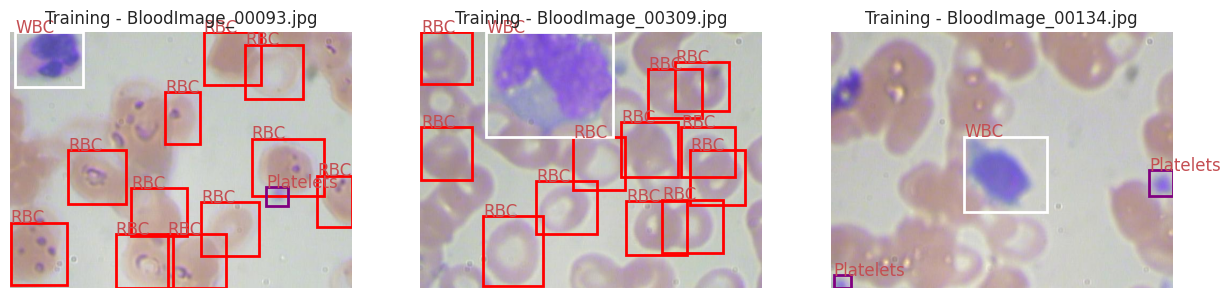

In [58]:
# select only images
images = df_all[df_all["filename"].apply(lambda s: s.split(".")[-1] in ["jpg"])]

label_colors = {"RBC": "red", "WBC": "white", "Platelets": "purple"}

# show 3 images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, (index, row) in enumerate(images.sample(3, random_state=42).iterrows()):
    # img show
    img = plt.imread(row["path"])
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title(f"{row['dataset']} - {row['filename']}")

    # get annotations
    annotations = get_annotations(
        row["path"].replace("Images", "Annotations").replace("jpg", "xml")
    )
    print(annotations)

    # show annotations
    for label, xmin, ymin, xmax, ymax in annotations:
        ax[i].add_patch(
            plt.Rectangle(
                (xmin, ymin),
                xmax - xmin,
                ymax - ymin,
                linewidth=2,
                edgecolor=label_colors[label],
                facecolor="none",
            )
        )
        ax[i].text(xmin, ymin, label, fontsize=12, color="r")

**Info:** From the images it is possible to see that the labels and annotations might not be perfect, some seem not to be perfectly annotated, some missing, and such. With that, the model can be only as good as the input data, so that might be a upper limit to its performance.


# 3 - EDA


# 4 - hyperparameter tuning


## .1 - initial baseline


# 5 - retraining


# 6 - model results


# 7 - Analisys


# 8 - conclusion
